# CLUSTERING PRACTICAL

## ARTIN

## Mathieu Lagrange

reports are to be sent to [mathieu dot lagrange at ec-nantes dot fr] no later than a week after the lab

So Onishi<br>
Send to: modan.tailleur@ls2n.fr

## Import tools

please import others if needed

In [362]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

## Data: generate a synthetic dataset

Generate a set of 100 points in a 2 dimensional space split into 4 non overlapping
clusters.

100点のデータを2次元空間に生成し、それを4つの非重複クラスタに分ける問題

In [363]:
# 適当なデータセットを作成
# np.random.seed(42)

points1 = np.random.randn(25, 2)
points2 = np.random.randn(25, 2) + np.array([5, 5])
points3 = np.random.randn(25, 2) + np.array([15, 15])
points4 = np.random.randn(25, 2) + np.array([30, 30])

print("points1:\n" + str(points1)) 

points1:
[[-0.89985919 -0.82467772]
 [ 0.41684046 -0.97539604]
 [ 0.76066137  1.11448629]
 [ 0.13694423  0.34335103]
 [ 1.23170022  0.04860643]
 [-1.63952731 -0.22756256]
 [ 0.11526943  0.04668359]
 [ 1.43807825 -1.62592937]
 [ 0.22077767  0.98576374]
 [ 0.19004437 -0.62916767]
 [ 1.07282747  0.91447887]
 [-0.88540962  1.26344064]
 [ 0.5344113   1.10147053]
 [ 1.45533044  0.66640818]
 [ 0.31504399  0.55349303]
 [ 0.19163613 -2.11915593]
 [ 1.19729331 -0.76526788]
 [ 0.5675599   0.52446574]
 [ 1.02937902  1.12055174]
 [ 0.90863891  2.14804887]
 [-0.19961889  1.14028099]
 [ 0.89521219  0.69687531]
 [ 0.72249347 -0.44150887]
 [ 0.4179889   0.79941937]
 [ 0.15914446 -0.11665813]]


In [364]:
# 各クラスタにラベルを割り当てる
labels1 = np.zeros(25)  # points1に0のラベルを割り当てる
labels2 = np.ones(25)   # points2に1のラベルを割り当てる
labels3 = np.full(25, 2)  # points3に2のラベルを割り当てる（np.fullで全要素を2にする）
labels4 = np.full(25, 3)  # points4に3のラベルを割り当てる（np.fullで全要素を3にする）

# ラベル配列を結合する
truth_labels = np.r_[labels1, labels2, labels3, labels4]

print(truth_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3.]


In [365]:
points = np.r_[points1, points2, points3, points4]
print(points);

[[-0.89985919 -0.82467772]
 [ 0.41684046 -0.97539604]
 [ 0.76066137  1.11448629]
 [ 0.13694423  0.34335103]
 [ 1.23170022  0.04860643]
 [-1.63952731 -0.22756256]
 [ 0.11526943  0.04668359]
 [ 1.43807825 -1.62592937]
 [ 0.22077767  0.98576374]
 [ 0.19004437 -0.62916767]
 [ 1.07282747  0.91447887]
 [-0.88540962  1.26344064]
 [ 0.5344113   1.10147053]
 [ 1.45533044  0.66640818]
 [ 0.31504399  0.55349303]
 [ 0.19163613 -2.11915593]
 [ 1.19729331 -0.76526788]
 [ 0.5675599   0.52446574]
 [ 1.02937902  1.12055174]
 [ 0.90863891  2.14804887]
 [-0.19961889  1.14028099]
 [ 0.89521219  0.69687531]
 [ 0.72249347 -0.44150887]
 [ 0.4179889   0.79941937]
 [ 0.15914446 -0.11665813]
 [ 4.3055494   5.61019581]
 [ 3.71158032  2.79217419]
 [ 3.97895365  4.56819713]
 [ 5.91653575  4.68932626]
 [ 5.63999919  3.99958239]
 [ 3.39229675  4.8910533 ]
 [ 6.00680877  6.28049983]
 [ 4.79228304  4.3746512 ]
 [ 5.00040095  4.909947  ]
 [ 6.36475563  5.82483385]
 [ 6.31202478  3.72785494]
 [ 5.38873797  6.46985667]
 

Text(0, 0.5, 'Feature 2')

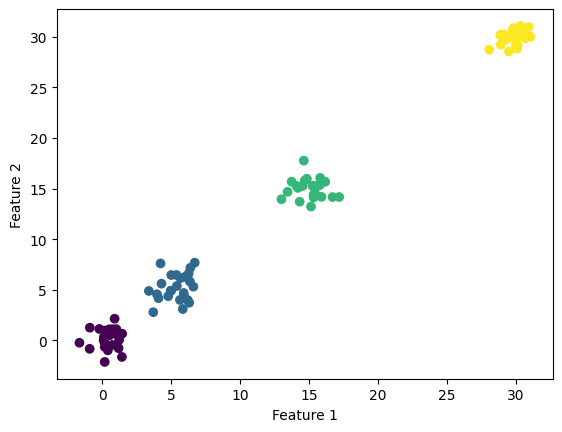

In [366]:
plt.scatter(points[:, 0], points[:, 1], c=truth_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Display the set with one color per cluster using the scatter function from matplotlib.pyplot

## Baseline: the random clustering algorithm

Cluster this dataset into k clusters by assigning a random integer value between 0 and k-1 to each point.

In [367]:
# ラベル配列を結合する
# pred_labels = np.random.randint(0, 4, points.shape[0])

# print(pred_labels)

In [368]:
# ランダムな予測ラベルを生成する関数
def generate_random_labels(num_points, num_classes):
    """
    指定された数のデータポイントに対して、0からnum_classes-1までのランダムなラベルを生成する。

    Parameters:
    num_points (int): ラベルを生成するデータポイントの数。
    num_classes (int): 生成するラベルのクラス数。

    Returns:
    numpy.array: 生成されたランダムラベルの配列。
    """
    return np.random.randint(0, num_classes, num_points)

In [369]:
pred_labels = generate_random_labels(len(points), 4)
print(pred_labels)

[3 3 0 2 3 2 2 1 2 0 1 2 3 2 2 0 0 2 3 2 1 0 2 2 2 0 1 1 1 3 3 1 0 2 2 2 3
 1 0 0 2 3 1 1 0 0 2 0 1 0 0 2 0 3 1 3 3 1 1 2 1 1 0 3 3 0 2 0 3 2 1 2 3 3
 2 3 3 0 3 3 3 0 2 3 1 1 2 0 3 0 0 2 0 3 3 0 3 3 2 0]


Text(0, 0.5, 'Feature 2')

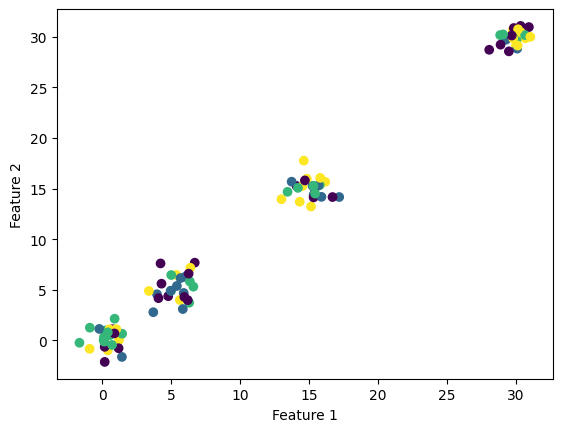

In [370]:
plt.scatter(points[:, 0], points[:, 1], c=pred_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## Metric: the rand index

Implement the rand index criterion (see https://en.wikipedia.org/wiki/Rand_index for reference)

In [371]:
# ランダムインデックスを計算する関数を定義する
def calculate_rand_index(truth_labels, pred_labels):
    n = len(truth_labels)
    tp = 0  # true positive
    tn = 0  # true negative

    for i in range(n):
        for j in range(i+1, n):
            if truth_labels[i] == truth_labels[j] and pred_labels[i] == pred_labels[j]:
                tp += 1
            elif truth_labels[i] != truth_labels[j] and pred_labels[i] != pred_labels[j]:
                tn += 1

    # ランダムインデックスの計算
    rand_index = (tp + tn) / (n * (n - 1) / 2)
    return rand_index

In [372]:
rand_index = calculate_rand_index(truth_labels, pred_labels)  # ランダムインデックスを計算
print("Calculated Rand Index:", rand_index)

Calculated Rand Index: 0.638989898989899


Compute the rand index between the reference clustering and 100 runs of the baseline algorithm.

基準クラスタリングとベースラインアルゴリズムの100回の実行の間のrandインデックスを計算する。

In [373]:
rand_indices = []
n = len(truth_labels)

for _ in range(n):
    pred_labels = generate_random_labels(len(points), 4)
    index = calculate_rand_index(truth_labels, pred_labels)
    rand_indices.append(index)

In [374]:
mean_rand_index = np.mean(rand_indices)
std_rand_index = np.std(rand_indices)

Display results and compute the mean and standard deviation.

結果を表示し、平均と標準偏差を計算する。

In [375]:
print(mean_rand_index)
print(std_rand_index)

0.6300626262626262
0.005779663109791727


## Hierarchical Clustering

Compute the euclidean distance matrix using the pdist function from scipy.spatial.distance

scipy.spatial.distanceのpdist関数を使用してユークリッド距離行列を計算します。

In [376]:
from scipy.spatial.distance import pdist, squareform

# ユークリッド距離を計算
distance = pdist(points)
distance_matrix = squareform(pdist(points))

Display and interpret its shape

In [377]:
# 距離行列を表示
print(distance)
print()
print(distance_matrix)

[1.32529769 2.55297583 1.56181065 ... 1.52841835 1.24640504 1.0312758 ]

[[ 0.          1.32529769  2.55297583 ... 43.12329245 43.15377267
  42.29954612]
 [ 1.32529769  0.          2.11797568 ... 42.29323544 42.36117554
  41.49278884]
 [ 2.55297583  2.11797568  0.         ... 40.58246966 40.60555956
  39.75376268]
 ...
 [43.12329245 42.29323544 40.58246966 ...  0.          1.52841835
   1.24640504]
 [43.15377267 42.36117554 40.60555956 ...  1.52841835  0.
   1.0312758 ]
 [42.29954612 41.49278884 39.75376268 ...  1.24640504  1.0312758
   0.        ]]


answer here

The one-dimensional array representing the Euclidean distances between data points in a dataset has a length of `{n*(n-1)}/2`, where `n` is the number of data points in the dataset. This length corresponds to the number of unique pairwise combinations of points in the dataset. The two-dimensional distance matrix expands these distances into an `n * n` matrix, with the rows and columns representing the data points, and zeroes on the diagonal representing the distance of each point to itself.

Compute the single link hierarchical clustering using the linkage function from scipy.cluster.hierarchy.

Display the corresponding dendrogram using the dendrogram function from scipy.cluster.hierarchy.

Implement a clustering algorithm that cuts the dendrogram in order to produce k clusters using the fcluster function from scipy.cluster.hierarchy.

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

Display results and compute the mean and standard deviation.

Explain why the standard deviation is 0.

answer here

## Partitional Clustering

Implement the k-means algorithm (see https://en.wikipedia.org/wiki/K-means_clustering section Standard algorithm for reference).

Hint: please consider the cdist function from scipy.spatial.distance to compute the distance of the points to the centroids.

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

Display results and compute the mean and standard deviation.

## Performance Analysis

Display the performance of the 3 clustering algorithms on the synthetic dataset using the bar function from matplotlib.pyplot.

Load the iris dataset using the load_iris function from scikit-learn and perform the same performance analysis using this dataset.

Load the Breast cancer wisconsin (diagnostic) dataset dataset using the load_breast_cancer function from scikit-learn and perform the same performance analysis using this dataset.

## [Bonus] Determining the number of clusters

Implement the gap statistic method for determining the optimal number of clusters for the 3 datasets.


Discuss the results.

answer here.